C:\Users\PMLS\AppData\Local\Temp\ipykernel_24600\312894676.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="pclass", y="survived", data=df, palette="Blues_d")


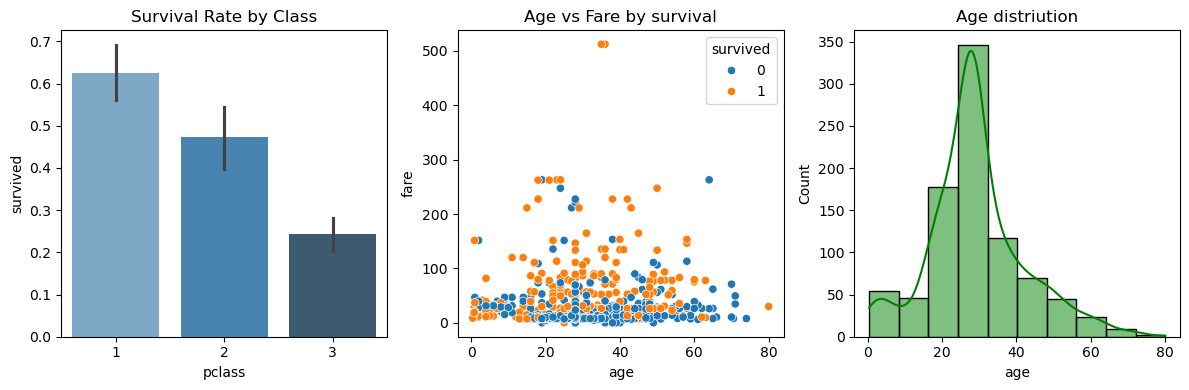

Optimization terminated successfully.
         Current function value: 0.587670
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.1166
Time:                        13:50:20   Log-Likelihood:                -522.44
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.114e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0562      0.355      8.601      0.000       2.360       3.753
age           -0.0377      0.

In [33]:
# Import libraries
import pandas as pd
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Load Data
df = sns.load_dataset("titanic")

# 1. basic cleaning
# Fill missing Age with median
df["age"]=df["age"].fillna(df["age"].median())

# Drop rows with missing Embarked
df=df.dropna(subset=["embarked"])
# 2. seaborn Visualizations
plt.figure(figsize=(12,4))

# Bar plot: survival by class
plt.subplot(1,3,1)
sns.barplot(x="pclass", y="survived", data=df, palette="Blues_d")
plt.title("Survival Rate by Class")

# Scatter plot: Age vs. Fare, colored by survival
plt.subplot(1,3,2)
sns.scatterplot(x="age", y="fare",hue="survived", data=df)
plt.title("Age vs Fare by survival")

# Histogram: Age distribution
plt.subplot(1,3,3)
sns.histplot(df["age"],bins=10, kde=True,color="green")
plt.title("Age distriution")
plt.tight_layout()
plt.show()

# 3. Statsmodel: Logistic Regression (Survival~age + class)
df["pclass"]=df["pclass"].astype(float)     # ensure numeric
x = sm.add_constant(df[["age","pclass"]])   # predictors
y = df["survived"]
model = sm.Logit(y,x).fit()
print(model.summary())
# 4. T-test (Age of survivors vs. non_ survivors)

from statsmodels.stats.weightstats import ttest_ind
age_survived = df[df["survived"] == 1]["age"]
age_not_survived = df[df["survived"] == 0]["age"]
t_stat, p_val, _ = ttest_ind(age_survived,age_not_survived)
print(f"T-test p-value for age by survival: {p_val}")
 


